In [1]:
import numpy as np                #importing numpy for performing a data analysis and manipulationg.
import matplotlib.pyplot as plt   #importing matplotlib.pyplot for collection of command style functions.
import pandas as pd               #importing pandas for data manipulation and analysis
import seaborn as sns             #importing seaborn for drawing attractive and informative statistical graphics.
from scipy.stats import skew      #Skew denotes statistical measure of asymmetric distribution of data.
from scipy.stats import kurtosis  #Kurtosis is fourth central moment divided by square of the variance.

In [2]:
# Data.head is specified a number of rows
Data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
Data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#it returns description of the data in the DataFrame.
Data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
# it returns the information about the dataframe
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#calculate mean/average of data set
print(Data.mean())

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64


In [6]:
#The median is (middle value) of the given data set.
print(Data.median())

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                           115.0
DEATH_EVENT                      0.0
dtype: float64


In [7]:
#Standard deviation measure spread of a distribution of the array elements
print(Data.std())

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
DEATH_EVENT                     0.467670
dtype: float64


In [8]:
#it is used to find the pairwise correlation 
Data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
#it is used to finds the covariance of each column in a DataFrame.
Data.cov()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,141.486483,0.519335,-9.415915e+02,-0.593633,8.460237,0.530565,-6.090712e+04,1.958845,-2.412544,0.372120,0.103847,-206.861351,1.411454
anaemia,0.519335,0.246122,-9.181641e+01,-0.003120,0.185282,0.009057,-2.124536e+03,0.026777,0.091681,-0.022480,-0.024893,-5.445142,0.015376
creatinine_phosphokinase,-941.591531,-91.816413,9.414586e+05,-4.620581,-506.174452,-32.748805,2.321533e+06,-16.470382,254.956443,37.017261,1.098696,-703.803618,28.464468
diabetes,-0.593633,-0.003120,-4.620581e+00,0.244102,-0.028361,-0.003008,4.454928e+03,-0.024010,-0.195226,-0.037261,-0.034006,1.293259,-0.000449
ejection_fraction,8.460237,0.185282,-5.061745e+02,-0.028361,140.063455,0.138325,8.354524e+04,-0.138379,9.185787,-0.839667,-0.372573,38.330464,-1.486667
high_blood_pressure,0.530565,0.009057,-3.274880e+01,-0.003008,0.138325,0.228614,2.336480e+03,-0.002441,0.078292,-0.023916,-0.012458,-7.289904,0.017744
platelets,-60907.118586,-2124.535856,2.321533e+06,4454.928228,83545.241001,2336.480427,9.565669e+09,-4168.399498,26810.436905,-5851.104689,1291.447854,79811.066099,-2247.619159
serum_creatinine,1.958845,0.026777,-1.647038e+01,-0.024010,-0.138379,-0.002441,-4.168399e+03,1.070211,-0.863173,0.003448,-0.013263,-11.988935,0.142374
serum_sodium,-2.412544,0.091681,2.549564e+02,-0.195226,9.185787,0.078292,2.681044e+04,-0.863173,19.469956,-0.058158,0.009932,30.014152,-0.402819
sex,0.372120,-0.022480,3.701726e+01,-0.037261,-0.839667,-0.023916,-5.851105e+03,0.003448,-0.058158,0.228614,0.099706,-0.579224,-0.000965


In [10]:
#Skew denotes statistical measure of asymmetric distribution of data. 
print(skew(Data, axis=0, bias=True))

[ 0.42093656  0.27686276  4.44068863  0.33225112  0.55259266  0.62358332
  1.45497453  4.43361016 -1.04287046 -0.62358332  0.76647879  0.1271606
  0.76647879]


In [11]:
#Kurtosis is  fourth central moment divided by square of the variance.
print(kurtosis(Data, axis=0, bias=True))

[-2.01793492e-01 -1.92334701e+00  2.47104580e+01 -1.88960920e+00
  2.07201302e-02 -1.61114384e+00  6.08590585e+00  2.53783458e+01
  4.03114230e+00 -1.61114384e+00 -1.41251026e+00 -1.21187428e+00
 -1.41251026e+00]


In [12]:
val = ['anaemia', 'diabetes', 'high_blood_pressure']
colour = ['skyblue', 'green'] 
y_lable = "Count of the variable (y)"

In [13]:
def bar_plot(values, colour, y_lable):
    """
    Given bar plots for each variable is explain against the DEATH_EVENT
    """
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

    for i, var in enumerate(values):
        barplot_values=Data.groupby([var, 'DEATH_EVENT']).size().unstack()
        barplot_values.plot(kind='bar', stacked=True, ax=axes[i], color=colour, fontsize = 14)
        axes[i].set_title(f'DEATH vs {var} ', fontsize = 14)
        axes[i].set_xlabel(var + " (X)", fontsize = 14)
        axes[i].set_ylabel(y_lable , fontsize = 14)
        axes[i].legend(title='DEATH_EVENT')

    plt.tight_layout()
    plt.show()
    
    return 

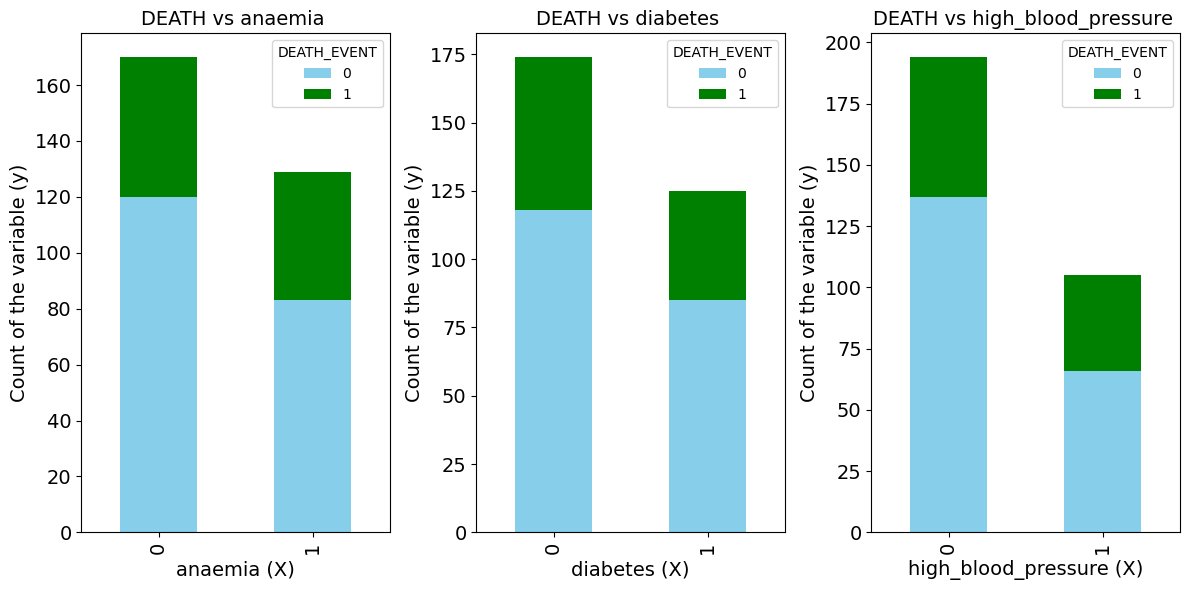

In [14]:
bar_plot(val, colour, y_lable )

In [15]:
title_bar = "Scatter plot of Age vs serum creatitnine values"
x_lable = "Age of people(x)"
y_lable = "Serum Creatinine values (log scale) (y)"

In [16]:
def scatter_plot_func(title_bar, x_lable, y_lable):
    """
    Plots the age of people and serum creatinine values indicating DEATH_EVENT
    """
    sns.scatterplot(x='age', y='serum_creatinine', data=Data, hue='DEATH_EVENT')
    plt.title(title_bar)
    plt.xlabel(x_lable)
    #plt.yscale('log')
    plt.ylabel(y_lable)
    plt.show()
    
    return

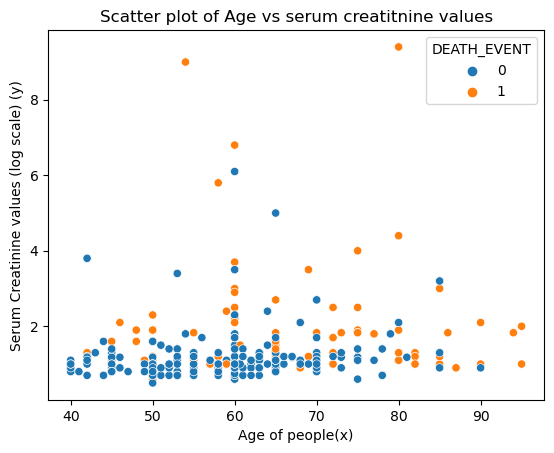

In [17]:
scatter_plot_func(title_bar, x_lable, y_lable)

In [18]:
column_values = ['age', 'anaemia', 'sex', 'smoking', 'DEATH_EVENT']
values = Data[column_values]
tilte = "Heatmap of correlation of various values"

In [19]:
def heat_map_func(values, title):
    """
    Heatmap elaborates the correlation matrix for the given DataFrame
    """
    correlation_matrix = values.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()
    
    return 

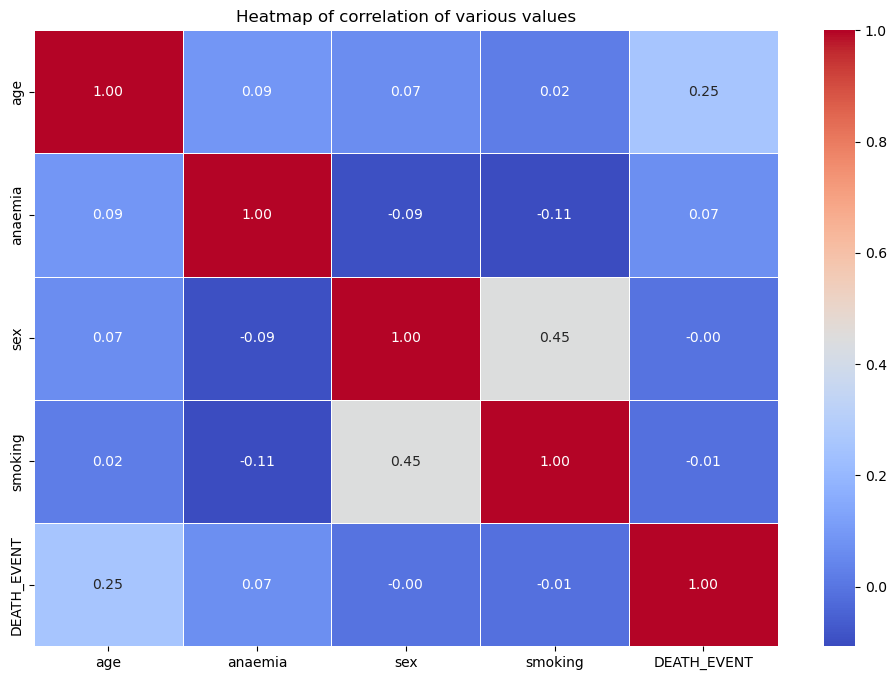

In [20]:
heat_map_func(values, tilte)